In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
import seaborn as sb
%matplotlib inline

In [2]:
# Load Dataset with all columns
# Making the data columns datetime objects with the parse_dates attribute
bikeshare_full = pd.read_csv('/Users/matthewcassi/Documents/Bike-Sharing-Dataset/less_bikeshare_lat_lon.csv', 
                        parse_dates=['Start date', 'End date', 'start_date_short', 'end_date_short'])
# Removing the Unnamed column
bikeshare_full.drop('Unnamed: 0', 1, inplace=True)

In [3]:
# Copying the dataset
bikeshare_machine = bikeshare_full.copy()
bikeshare_machine.head(10)

,Start date,End date,start_station,start_station_code,end_station,end_station_code,Member Type,start_date_short,end_date_short,time_diff,...,workingday,weathersit,temp,hum,windspeed,start_lat,start_lon,end_lat,end_lon,miles
0,2011-03-31 23:58:00,2011-04-01 00:00:00,14th & Harvard St NW,31105.0,16th & Harvard St NW,31103.0,Registered,2011-03-31,2011-04-01,1.833,...,1,3,0.268333,0.918333,0.217646,38.926800,-77.032200,38.926088,-77.036536,0.238743
1,2011-03-31 23:47:00,2011-03-31 23:50:00,Lincoln Park / 13th & East Capitol St NE,31619.0,13th & H St NE,31611.0,Registered,2011-03-31,2011-03-31,3.317,...,1,3,0.268333,0.918333,0.217646,38.890461,-76.988355,38.900022,-76.988422,0.659533
2,2011-03-31 23:45:00,2011-03-31 23:50:00,14th & R St NW,31202.0,Massachusetts Ave & Dupont Circle NW,31200.0,Registered,2011-03-31,2011-03-31,5.733,...,1,3,0.268333,0.918333,0.217646,38.912939,-77.032085,38.910100,-77.044400,0.691996
3,2011-03-31 23:34:00,2011-03-31 23:43:00,Park Rd & Holmead Pl NW,31602.0,15th & P St NW,31201.0,Registered,2011-03-31,2011-03-31,8.700,...,1,3,0.268333,0.918333,0.217646,38.930800,-77.031500,38.909850,-77.034438,1.453796
4,2011-03-31 23:31:00,2011-03-31 23:39:00,37th & O St NW / Georgetown University,31236.0,21st & M St NW,31212.0,Registered,2011-03-31,2011-03-31,7.850,...,1,3,0.268333,0.918333,0.217646,38.907740,-77.071652,38.905340,-77.046774,1.351053
5,2011-03-31 23:30:00,2011-03-31 23:33:00,14th & Harvard St NW,31105.0,14th & V St NW,31101.0,Registered,2011-03-31,2011-03-31,2.933,...,1,3,0.268333,0.918333,0.217646,38.926800,-77.032200,38.917600,-77.032100,0.634647
6,2011-03-31 23:29:00,2011-03-31 23:39:00,Lamont & Mt Pleasant NW,31107.0,7th & T St NW,31109.0,Registered,2011-03-31,2011-03-31,9.917,...,1,3,0.268333,0.918333,0.217646,38.931900,-77.038800,38.915500,-77.022200,1.442193
7,2011-03-31 23:28:00,2011-03-31 23:45:00,13th St & New York Ave NW,31227.0,Georgia Ave and Fairmont St NW,31207.0,Registered,2011-03-31,2011-03-31,17.100,...,1,3,0.268333,0.918333,0.217646,38.900283,-77.029822,38.924900,-77.022200,1.747077
8,2011-03-31 23:25:00,2011-03-31 23:29:00,New York Ave & 15th St NW,31222.0,20th & E St NW,31204.0,Registered,2011-03-31,2011-03-31,4.500,...,1,3,0.268333,0.918333,0.217646,38.899100,-77.033700,38.896300,-77.045000,0.639011
9,2011-03-31 23:21:00,2011-03-31 23:44:00,Calvert St & Woodley Pl NW,31106.0,14th St & Spring Rd NW,31401.0,Registered,2011-03-31,2011-03-31,22.667,...,1,3,0.268333,0.918333,0.217646,38.923583,-77.050046,38.937500,-77.032800,1.336057


In [4]:
# creating a list of columns which will be used to create the list of columns to keep for the machine
# learning piece
list(bikeshare_machine.columns)

['Start date',
 'End date',
 'start_station',
 'start_station_code',
 'end_station',
 'end_station_code',
 'Member Type',
 'start_date_short',
 'end_date_short',
 'time_diff',
 'season',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed',
 'start_lat',
 'start_lon',
 'end_lat',
 'end_lon',
 'miles']

In [5]:
# Selecting the columns that are needed for the analysis
included_cols = ['start_station',
                 'end_station',
                 'Member Type',
                 'time_diff',
                 'season',
                 'mnth',
                 'holiday',
                 'weekday',
                 'workingday',
                 'weathersit',
                 'temp',
                 'hum',
                 'windspeed',
                 'miles']
# Subsetting the dataset so that only the columns above are included
bikeshare_machine = bikeshare_machine[included_cols]
bikeshare_machine.head()

,start_station,end_station,Member Type,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,miles
0,14th & Harvard St NW,16th & Harvard St NW,Registered,1.833,2,3,0,4,1,3,0.268333,0.918333,0.217646,0.238743
1,Lincoln Park / 13th & East Capitol St NE,13th & H St NE,Registered,3.317,2,3,0,4,1,3,0.268333,0.918333,0.217646,0.659533
2,14th & R St NW,Massachusetts Ave & Dupont Circle NW,Registered,5.733,2,3,0,4,1,3,0.268333,0.918333,0.217646,0.691996
3,Park Rd & Holmead Pl NW,15th & P St NW,Registered,8.700,2,3,0,4,1,3,0.268333,0.918333,0.217646,1.453796
4,37th & O St NW / Georgetown University,21st & M St NW,Registered,7.850,2,3,0,4,1,3,0.268333,0.918333,0.217646,1.351053


In [6]:
bikeshare_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219847 entries, 0 to 1219846
Data columns (total 14 columns):
start_station    1219847 non-null object
end_station      1219847 non-null object
Member Type      1219847 non-null object
time_diff        1219847 non-null float64
season           1219847 non-null int64
mnth             1219847 non-null int64
holiday          1219847 non-null int64
weekday          1219847 non-null int64
workingday       1219847 non-null int64
weathersit       1219847 non-null int64
temp             1219847 non-null float64
hum              1219847 non-null float64
windspeed        1219847 non-null float64
miles            1219847 non-null float64
dtypes: float64(5), int64(6), object(3)
memory usage: 130.3+ MB


In [7]:
bikeshare_machine['season'] = bikeshare_machine['season'].astype('category')
bikeshare_machine['mnth'] = bikeshare_machine['mnth'].astype('category')
bikeshare_machine['holiday'] = bikeshare_machine['holiday'].astype('category')
bikeshare_machine['weekday'] = bikeshare_machine['weekday'].astype('category')
bikeshare_machine['workingday'] = bikeshare_machine['workingday'].astype('category')
bikeshare_machine['weathersit'] = bikeshare_machine['weathersit'].astype('category')
bikeshare_machine['Member Type'] = bikeshare_machine['Member Type'].astype('category')

In [8]:
bikeshare_machine['start_station'] = bikeshare_machine['start_station'].astype('category')
bikeshare_machine['end_station'] = bikeshare_machine['end_station'].astype('category')

In [9]:
bikeshare_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219847 entries, 0 to 1219846
Data columns (total 14 columns):
start_station    1219847 non-null category
end_station      1219847 non-null category
Member Type      1219847 non-null category
time_diff        1219847 non-null float64
season           1219847 non-null category
mnth             1219847 non-null category
holiday          1219847 non-null category
weekday          1219847 non-null category
workingday       1219847 non-null category
weathersit       1219847 non-null category
temp             1219847 non-null float64
hum              1219847 non-null float64
windspeed        1219847 non-null float64
miles            1219847 non-null float64
dtypes: category(9), float64(5)
memory usage: 59.3 MB


In [10]:
col_names = ['start_station', 'end_station','member_type','time_diff','season','month','holiday',
             'weekday','work_day','weather_cat','temp','humidity','windspeed','miles']
bikeshare_machine.columns = col_names

In [11]:
bikeshare_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219847 entries, 0 to 1219846
Data columns (total 14 columns):
start_station    1219847 non-null category
end_station      1219847 non-null category
member_type      1219847 non-null category
time_diff        1219847 non-null float64
season           1219847 non-null category
month            1219847 non-null category
holiday          1219847 non-null category
weekday          1219847 non-null category
work_day         1219847 non-null category
weather_cat      1219847 non-null category
temp             1219847 non-null float64
humidity         1219847 non-null float64
windspeed        1219847 non-null float64
miles            1219847 non-null float64
dtypes: category(9), float64(5)
memory usage: 59.3 MB


In [12]:
bikeshare_machine['holiday'].describe()

count     1219847
unique          2
top             0
freq      1191865
Name: holiday, dtype: int64

In [13]:
bikeshare_dummy = pd.get_dummies(bikeshare_machine, 
                                 columns=['start_station','end_station','member_type','season','month','holiday',
                                          'weekday','work_day','weather_cat'], drop_first=True)
bikeshare_dummy.head()

,time_diff,temp,humidity,windspeed,miles,start_station_10th & U St NW,start_station_10th St & Constitution Ave NW,start_station_11th & H St NE,start_station_11th & Kenyon St NW,start_station_12th & Army Navy Dr,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,work_day_1,weather_cat_2,weather_cat_3
0,1.833,0.268333,0.918333,0.217646,0.238743,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,3.317,0.268333,0.918333,0.217646,0.659533,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,5.733,0.268333,0.918333,0.217646,0.691996,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
3,8.700,0.268333,0.918333,0.217646,1.453796,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,7.850,0.268333,0.918333,0.217646,1.351053,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [14]:
bikeshare_dummy.columns

Index(['time_diff', 'temp', 'humidity', 'windspeed', 'miles',
       'start_station_10th & U St NW',
       'start_station_10th St & Constitution Ave NW',
       'start_station_11th & H St NE', 'start_station_11th & Kenyon St NW',
       'start_station_12th & Army Navy Dr',
       ...
       'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'work_day_1', 'weather_cat_2',
       'weather_cat_3'],
      dtype='object', length=290)

In [15]:
from sklearn.utils import shuffle
bikeshare_dummy = shuffle(bikeshare_dummy)

In [24]:
#bikeshare_dummy.to_csv('bikeshare_dummy.csv')

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.decomposition import PCA

In [17]:
#columns = ['temp', 'humidity','windspeed', 'miles', 'casual', 'registered', 'spring', 'summer',
 #      'fall', 'winter', 'jan', 'feb', 'march', 'april', 'may', 'june', 'july',
  #     'august', 'sept', 'oct', 'nov', 'dec', 'notholiday', 'holiday',
   #    'sun', 'mon', 'tues', 'wed', 'thurs', 'fri',
    #   'sat', 'not_work_day', 'work_day', 'sunny', 'cloudy', 'rainy']
#columns = ['temp', 'humidity','windspeed', 'miles', 'registered', 'summer',
 #      'fall', 'winter', 'feb', 'march', 'april', 'may', 'june', 'july',
  #     'august', 'sept', 'oct', 'nov', 'dec', 'holiday',
   #    'mon', 'tues', 'wed', 'thurs', 'fri',
    #   'sat', 'work_day', 'cloudy', 'rainy']
X = bikeshare_dummy.drop('time_diff', 1)
y = bikeshare_dummy['time_diff']

In [18]:
X.head(20)

,temp,humidity,windspeed,miles,start_station_10th & U St NW,start_station_10th St & Constitution Ave NW,start_station_11th & H St NE,start_station_11th & Kenyon St NW,start_station_12th & Army Navy Dr,start_station_12th & Newton St NE,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,work_day_1,weather_cat_2,weather_cat_3
290368,0.535000,0.747500,0.189667,2.941371,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
743241,0.220833,0.490000,0.066542,1.141444,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
343384,0.631667,0.729167,0.326500,2.082994,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1157065,0.514167,0.755833,0.110704,0.634647,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
562915,0.717500,0.423750,0.164796,0.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
217500,0.620000,0.354167,0.253121,0.988326,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
365990,0.456667,0.479583,0.303496,0.939020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
902268,0.543333,0.906250,0.248150,2.190344,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
855176,0.470000,0.812917,0.197763,0.983101,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
873051,0.422500,0.629167,0.092667,0.520050,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(914885, 289)
(914885,)
(304962, 289)
(304962,)


In [23]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
model_1_pred = model_1.predict(X_test)
model_1_test_score = model_1.score(X_test, y_test)
model_1_mse = mean_squared_error(y_test, model_1_pred)
model_1_rmse = np.sqrt(model_1_mse)

In [24]:
model_1_evar = explained_variance_score(y_test, model_1_pred)

In [25]:
print(model_1_test_score)
print(model_1_mse)
print(model_1_rmse)
print(model_1_evar)

0.416113327301
79.3741295458
8.9092159894
0.416115282804


In [26]:
adjusted_r = 1 - (1-model_1_r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adjusted_r)

0.41555947513


In [29]:
cvscores_10_model_1 = cross_val_score(model_1, X_train, y_train, cv=5)

In [30]:
cvscores_10_model_1

array([ -9.13678478e+08,  -9.03942318e+01,   4.17719815e-01,
         4.14047911e-01,   4.12175380e-01])

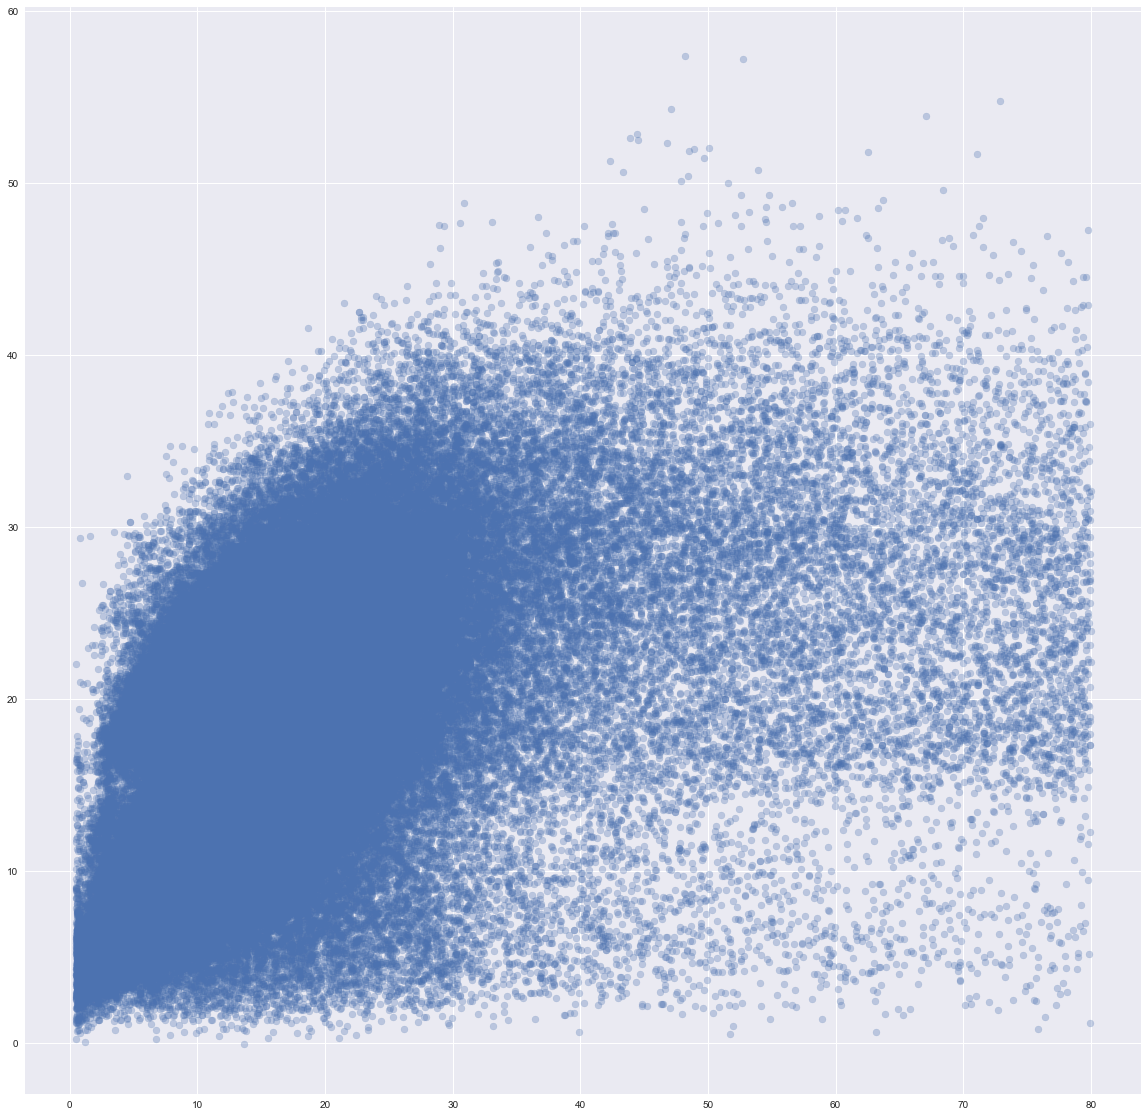

In [31]:
plt.figure(figsize=(20,20))
plt.scatter(y_test, model_1_pred, alpha=0.3)

In [32]:
model_1.coef_

array([  2.71190701e+00,  -4.42226550e-01,  -1.03950468e+00,
         6.13372320e+00,  -6.79846437e-01,   4.11355555e+00,
        -4.45174297e-01,  -1.35398161e+00,   1.96226264e+00,
         1.06955851e-01,  -1.28237433e+00,  -4.90993402e-01,
         9.46793230e-01,   3.92585049e+00,  -4.64269683e-01,
         1.79072200e+00,  -1.86090771e+00,  -7.02601992e-01,
        -2.36638236e-01,  -9.06208899e-01,  -1.70033595e+00,
        -1.05836341e+00,   3.55000761e+00,   1.39860287e-01,
        -1.26834379e+00,  -1.63703284e+00,  -1.15313590e-01,
         8.42316079e-01,   1.52642484e-01,   6.82916930e-01,
         1.86644956e+00,   1.01729183e-01,   2.85077090e-01,
         6.43812441e+00,  -6.71950528e-03,   4.33073639e-01,
         4.94525409e-01,  -2.34511815e-01,   1.28023047e+00,
         2.72487215e+00,   1.61578710e+00,  -1.20235653e+00,
        -4.28137884e-01,   7.43303809e-01,   7.41360992e-02,
         1.55268775e-01,   5.18038839e-01,  -6.71153757e-01,
        -1.05338845e+00,

# Model 3

In [33]:
X = bikeshare_dummy.drop('time_diff', 1)
y = bikeshare_dummy['time_diff']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)

In [35]:
lasso_1 = LassoCV(cv=5, fit_intercept=True)
lasso_1.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [36]:
lasso_1_coef = lasso_1.coef_
print(lasso_1_coef)

[  2.61906717  -0.          -0.26394142   6.14878455  -0.56656958
   3.70294288  -0.          -1.13348852   0.           0.          -1.14534732
  -0.38297316   0.50553332   3.37361778  -0.19230836   1.36707205
  -1.70239488  -0.57623819  -0.18748653  -0.86687026  -1.17676781  -0.
   1.85182222   0.          -0.          -1.47891717  -0.06557315
   0.3756555    0.           0.           1.12535615  -0.           0.
   6.05386567  -0.           0.           0.04268077  -0.           0.
   1.08534089   1.19376245  -0.          -0.33326463   0.49337421  -0.           0.
   0.23823788  -0.          -0.          -0.          -0.03185579
   0.44413111  -0.          -0.          -0.          -0.36722055
   0.02777832   0.          -0.21376963   0.87241855   0.5165325   -0.          -0.
  -0.44169153  -0.           0.81677339  -0.          -1.25549495   0.           0.
   0.           0.           0.          -0.          -0.           2.79047478
  -0.          -0.43296031   0.          -0.   

In [37]:
lasso_1.alpha_

0.0035542395031332584

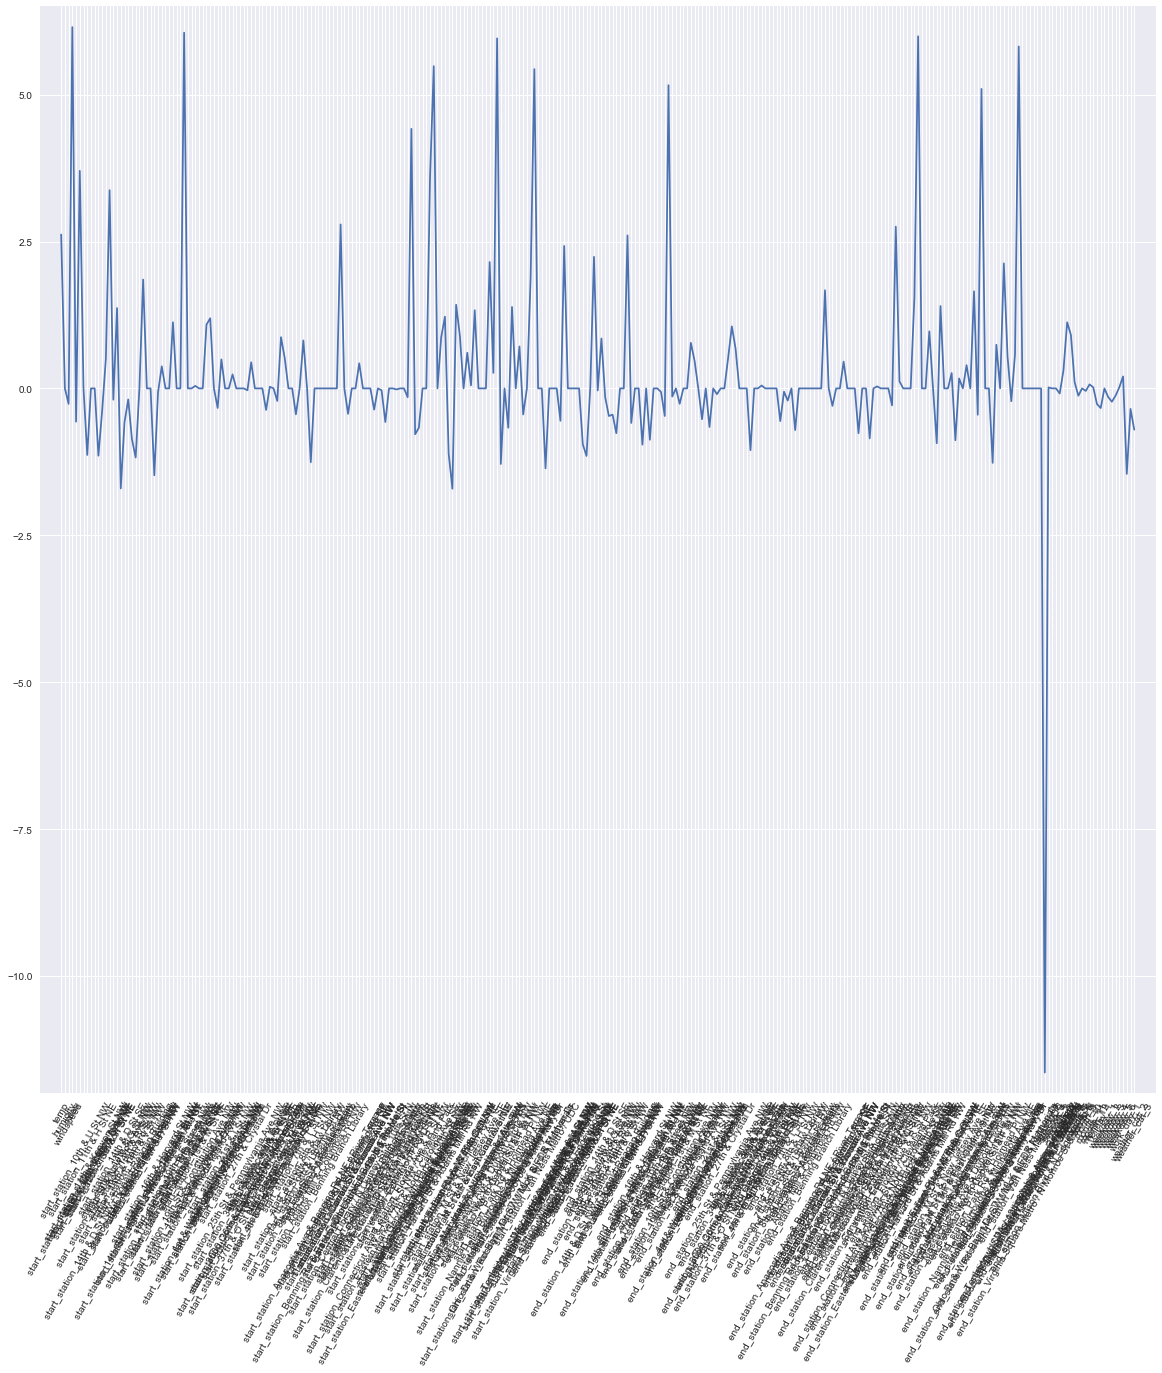

In [39]:
plt.figure(figsize=(20,20))
plt.plot(range(len(X.columns)), lasso_1_coef)
plt.xticks(range(len(X.columns)), X.columns, rotation=60)
plt.margins(0.02)
plt.show()

In [40]:
lasso_1_pred = lasso_1.predict(X_test)
lasso_1_test_score = lasso_1.score(X_test, y_test)
lasso_1_mse = mean_squared_error(y_test, lasso_1_pred)
lasso_1_rmse = np.sqrt(lasso_1_mse)
lasso_1_evar = explained_variance_score(y_test, lasso_1_pred)
adjusted_r_l1 = 1 - (1-lasso_1_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [42]:
print(lasso_1_test_score)
print(lasso_1_mse)
print(lasso_1_rmse)
print(lasso_1_evar)
print(adjusted_r_l1)

0.413203752518
79.7696600083
8.93138623105
0.413205563528
0.412647140439


In [43]:
df = pd.DataFrame({'col': X.columns, 'coef': lasso_1_coef})
small_df = df[df['coef'] != 0]
cols = list(small_df['col'])
cols

['temp',
 'windspeed',
 'miles',
 'start_station_10th & U St NW',
 'start_station_10th St & Constitution Ave NW',
 'start_station_11th & Kenyon St NW',
 'start_station_13th & D St NE',
 'start_station_13th & H St NE',
 'start_station_13th St & New York Ave NW',
 'start_station_14th & D St NW / Ronald Reagan Building',
 'start_station_14th & D St SE',
 'start_station_14th & G St NW',
 'start_station_14th & Harvard St NW',
 'start_station_14th & R St NW',
 'start_station_14th & Rhode Island Ave NW',
 'start_station_14th & V St NW',
 'start_station_14th St & Spring Rd NW',
 'start_station_15th & Crystal Dr',
 'start_station_16th & Harvard St NW',
 'start_station_17th & Corcoran St NW',
 'start_station_17th & K St NW / Farragut Square',
 'start_station_19th & E Street NW',
 'start_station_19th St & Constitution Ave NW',
 'start_station_1st & M St NE',
 'start_station_20th & Crystal Dr',
 'start_station_20th & E St NW',
 'start_station_20th St & Florida Ave NW',
 'start_station_21st & I St 

# Model 4

In [44]:
X = bikeshare_dummy[cols]
y = bikeshare_dummy['time_diff']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)

In [46]:
model_4 = LinearRegression()
model_4.fit(X_train, y_train)
model_4_pred = model_4.predict(X_test)
model_4_test_score = model_4.score(X_test, y_test)
model_4_mse = mean_squared_error(y_test, model_4_pred)
model_4_rmse = np.sqrt(model_4_mse)
model_4_evar = explained_variance_score(y_test, model_4_pred)
adjusted_r_4 = 1 - (1-model_4_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

cvscores_10_model_4 = cross_val_score(model_4, X_train, y_train, cv=10)

In [47]:
print(model_4_test_score)
print(model_4_mse)
print(model_4_rmse)
print(model_4_evar)
print(adjusted_r_4)
print(cvscores_10_model_4)

0.415123104028
79.5087414731
8.91676743406
0.415125029375
0.414825682327
[ 0.40858081  0.40878806  0.41543798  0.40871842  0.41315491  0.42117459
  0.41237717  0.41424665  0.41240704  0.41050749]


# Model 5

In [48]:
X = bikeshare_dummy.drop('time_diff', 1)
y = bikeshare_dummy['time_diff']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)

In [51]:
ridge_1 = RidgeCV(cv=5, fit_intercept=True)
ridge_1.fit(X_train, y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=5, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [52]:
ridge_1_pred = ridge_1.predict(X_test)
ridge_1_test_score = ridge_1.score(X_test, y_test)
ridge_1_mse = mean_squared_error(y_test, ridge_1_pred)
ridge_1_rmse = np.sqrt(ridge_1_mse)
ridge_1_evar = explained_variance_score(y_test, ridge_1_pred)
adjusted_r_r1 = 1 - (1-ridge_1_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [53]:
print(ridge_1_test_score)
print(ridge_1_mse)
print(ridge_1_rmse)
print(ridge_1_evar)
print(adjusted_r_r1)

0.416123177765
79.372790464
8.90914083759
0.416125156337
0.415569334939


# Model 6

In [54]:
X = bikeshare_dummy.drop('time_diff', 1)
y = bikeshare_dummy['time_diff']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)

In [57]:
pca = PCA()
pca.fit(X_train)
pca_features = pca.transform(X_train)

In [58]:
pca_var = pca.explained_variance_
pca_var_df = pd.DataFrame(pca_var, columns=['pca_var'])
pca_var_df['pca_feature'] =  np.array(range(1,290))

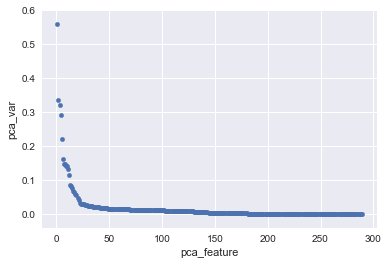

In [59]:
plt.figure(figsize=(20,20))
pca_var_df.plot.scatter(x='pca_feature', y='pca_var')

In [69]:
pca_6 = PCA(n_components=25)
pca_6.fit(X_train)
pca_6_features = pca_6.transform(X_train)
pca_6_test_features = pca_6.transform(X_test)

In [70]:
model_11 = LinearRegression()
model_11.fit(pca_6_features, y_train)
model_11_pred = model_11.predict(pca_6_test_features)
model_11_test_score = model_11.score(pca_6_test_features, y_test)
model_11_mse = mean_squared_error(y_test, model_11_pred)
model_11_rmse = np.sqrt(model_11_mse)
model_11_evar = explained_variance_score(y_test, model_11_pred)
adjusted_r_11 = 1 - (1-model_11_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

cvscores_10_model_11 = cross_val_score(model_11, pca_6_features, y_train, cv=5)

In [71]:
print(model_11_test_score)
print(model_11_mse)
print(model_11_rmse)
print(model_11_evar)
print(adjusted_r_11)
print(cvscores_10_model_11)

0.381503553275
84.0790163251
9.16946107059
0.381504994076
0.380916871621
[ 0.37523574  0.37844007  0.38423091  0.38024875  0.37791733]


# Model 7

In [74]:
X = bikeshare_dummy.drop('time_diff', 1)
y = bikeshare_dummy['time_diff']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=17)

In [75]:
parameters = {'l1_ratio':np.linspace(0.033,1,30)}
elastic = ElasticNet()
ecv = GridSearchCV(elastic, param_grid=parameters, cv=5)
ecv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'l1_ratio': array([ 0.033  ,  0.06634,  0.09969,  0.13303,  0.16638,  0.19972,
        0.23307,  0.26641,  0.29976,  0.3331 ,  0.36645,  0.39979,
        0.43314,  0.46648,  0.49983,  0.53317,  0.56652,  0.59986,
        0.63321,  0.66655,  0.6999 ,  0.73324,  0.76659,  0.79993,
        0.83328,  0.86662,  0.89997,  0.93331,  0.96666,  1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [76]:
ecv_pred = ecv.predict(X_test)
ecv_test_score = ecv.score(X_test, y_test)
ecv_mse = mean_squared_error(y_test, ecv_pred)
ecv_rmse = np.sqrt(ecv_mse)
ecv_evar = explained_variance_score(y_test, ecv_pred)
adjusted_r_ecv = 1 - (1-ecv_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [77]:
print(ecv_test_score)
print(ecv_mse)
print(ecv_rmse)
print(ecv_evar)
print(adjusted_r_ecv)

0.302830807359
94.7738669153
9.73518705086
0.302831075029
0.3021694998


In [78]:
ecv.best_params_

{'l1_ratio': 1.0}